<a href="https://colab.research.google.com/github/nitishmcfc/AI-ML/blob/main/PCA/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing PCA
## Section A: Using Scikit Learn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Importing IRIS Dataset

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df=pd.read_csv(url,names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Splitting features into x and flower type into y
features=['sepal length','sepal width','petal length','petal width']
x=df.loc[:,features].values
y=df.iloc[:,-1].values

In [ ]:
#PCA tends to be sensitive towards large difference of values and that is why it is important to scale it so that the numbers are in common range.
x=StandardScaler().fit_transform(x)

In [ ]:
print("Before\n",df[features].head())

print("After \n",pd.DataFrame(x,columns=features).head())

Before
    sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
After 
    sepal length  sepal width  petal length  petal width
0     -0.900681     1.032057     -1.341272    -1.312977
1     -1.143017    -0.124958     -1.341272    -1.312977
2     -1.385353     0.337848     -1.398138    -1.312977
3     -1.506521     0.106445     -1.284407    -1.312977
4     -1.021849     1.263460     -1.341272    -1.312977


In [ ]:
#n_components denotes the final number of dimensions to keep. Selecting that as 2 for plotting it.

pca=PCA(n_components=2)
principal_components=pca.fit_transform(x)

principalDF=pd.DataFrame(data=principal_components,columns=['comp1','comp2'])

In [ ]:
principalDF.head()

,comp1,comp2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [ ]:
#Adding target variable to the final DF
finalDf = pd.concat([principalDF, df[['target']]], axis = 1)

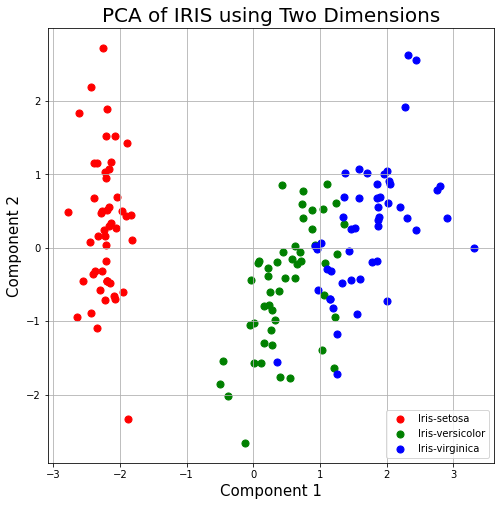

In [ ]:
#To plot the dataframe
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Component 1',fontsize=15)
ax.set_ylabel('Component 2',fontsize=15)

ax.set_title("PCA of IRIS using Two Dimensions",fontsize=20)
targets=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors=['r','g','b']


for target,color in zip(targets,colors):
  indicestokeep=finalDf['target']==target
  ax.scatter(x=finalDf.loc[indicestokeep,'comp1'],y=finalDf.loc[indicestokeep,'comp2'],c=color,s=50)

ax.legend(targets)
ax.grid()